In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG
from bokeh.models import DatetimeTickFormatter
from backtesting import set_bokeh_output
set_bokeh_output(notebook=False)


plt.style.use('fivethirtyeight')
# yf.pdr_override()

stocksymbols = 'TATAMOTORS.NS'
startdate = date(2017, 8, 4)
end_date = date.today()
print(end_date)

def getMyPortfolio(stocks=stocksymbols, start=startdate, end = end_date):
    data = yf.download(stocksymbols, start=start, end=end)
    return data


2023-10-25


/Users/iiicemane/Library/Python/3.10/lib/python/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/Users/iiicemane/Library/Python/3.10/lib/python/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


In [2]:
data = getMyPortfolio(stocksymbols,date(2017,8,4), date.today() )
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017
...,...,...,...,...,...,...
2023-10-17,670.000000,670.900024,654.650024,655.700012,655.700012,10263992
2023-10-18,658.599976,672.250000,653.799988,668.500000,668.500000,14908778
2023-10-19,662.950012,672.299988,658.599976,668.799988,668.799988,10633043


In [3]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])


In [4]:
formatter = DatetimeTickFormatter(days='%d %b')

class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(GOOG, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()


Row(id='1450', ...)

In [5]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

/var/folders/cy/tszj_7ws7hb7fp3pcv_8q62h0000gn/T/ipykernel_2050/1077273166.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA 30'][i] > data['SMA 100'][i]:
/var/folders/cy/tszj_7ws7hb7fp3pcv_8q62h0000gn/T/ipykernel_2050/1077273166.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['SMA 30'][i] < data['SMA 100'][i]:
/var/folders/cy/tszj_7ws7hb7fp3pcv_8q62h0000gn/T/ipykernel_2050/1077273166.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-17,670.000000,670.900024,654.650024,655.700012,655.700012,10263992,627.550000,604.522001,NaN,NaN
2023-10-18,658.599976,672.250000,653.799988,668.500000,668.500000,14908778,629.533333,606.058501,NaN,NaN
2023-10-19,662.950012,672.299988,658.599976,668.799988,668.799988,10633043,631.454999,607.562001,NaN,NaN


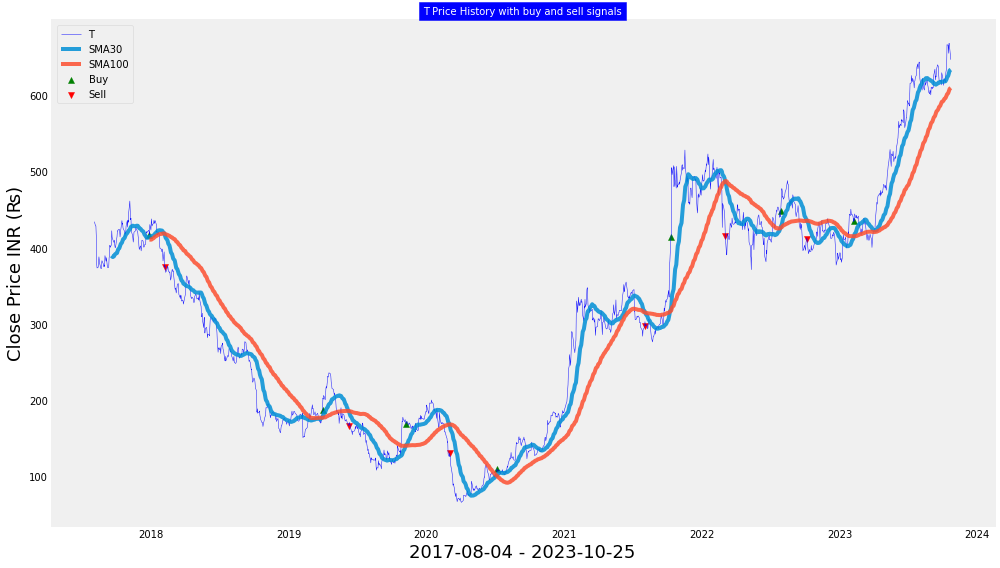

In [6]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()


Code edited and credited by Jonathan D. Goins
Sources:
https://tradewithpython.com/generating-buy-sell-signals-using-python#heading-3-implementation-of-the-strategies